In [16]:
import pandas as pd
import re

In [60]:
data = pd.read_csv(r'D:\Train\Cyber_Bulling\cyberbullying_tweets.csv')
print(data['cyberbullying_type'].value_counts())
data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
data.tweet_text

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


C:\Users\user1\AppData\Local\Temp\ipykernel_9996\1894257546.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)


0        in other words #katandandre, your food was cra...
1        why is #aussietv so white? #mkr #theblock #ima...
2        @xochitlsuckkks a classy whore? or more red ve...
3        @jason_gio meh. :p  thanks for the heads up, b...
4        @rudhoeenglish this is an isis account pretend...
                               ...                        
47687    black ppl aren't expected to do anything, depe...
47688    turner did not withhold his disappointment. tu...
47689    i swear to god. this dumb nigger bitch. i have...
47690    yea fuck you rt @therealexel: if youre a nigge...
47691    bro. u gotta chill rt @chillshrammy: dog fuck ...
Name: tweet_text, Length: 47692, dtype: object

In [63]:
url_pattern = re.compile(r'https?://\S
+')
def remove_url(text):
    return url_pattern.sub(',', text)

data['tweet_text'] = data['tweet_text'].apply(remove_url)
data = data.replace(to_replace=r'[^\w\s]', value='', regex=True)
data = data.replace(to_replace=r'\d', value='', regex=True)
data['tweet_text']


0        in other words katandandre your food was crapi...
1        why is aussietv so white mkr theblock imaceleb...
2        xochitlsuckkks a classy whore or more red velv...
3        jason_gio meh p  thanks for the heads up but n...
4        rudhoeenglish this is an isis account pretendi...
                               ...                        
47687    black ppl arent expected to do anything depend...
47688    turner did not withhold his disappointment tur...
47689    i swear to god this dumb nigger bitch i have g...
47690    yea fuck you rt therealexel if youre a nigger ...
47691    bro u gotta chill rt chillshrammy dog fuck kp ...
Name: tweet_text, Length: 47692, dtype: object

In [64]:
import nltk
from nltk.tokenize import word_tokenize

data['tweet_text'] = data['tweet_text'].apply(word_tokenize)

In [68]:
data['tweet_text']

0        [in, other, words, katandandre, your, food, wa...
1        [why, is, aussietv, so, white, mkr, theblock, ...
2        [xochitlsuckkks, a, classy, whore, or, more, r...
3        [jason_gio, meh, p, thanks, for, the, heads, u...
4        [rudhoeenglish, this, is, an, isis, account, p...
                               ...                        
47687    [black, ppl, arent, expected, to, do, anything...
47688    [turner, did, not, withhold, his, disappointme...
47689    [i, swear, to, god, this, dumb, nigger, bitch,...
47690    [yea, fuck, you, rt, therealexel, if, youre, a...
47691    [bro, u, got, ta, chill, rt, chillshrammy, dog...
Name: tweet_text, Length: 47692, dtype: object

In [75]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['tweet_text'] = data['tweet_text'].apply(lambda x: [word for word in x if word not in stop_words and len(word) > 3])

In [76]:
data['tweet_text']

0                      [word, katandandr, food, crapilici]
1        [aussietv, white, theblock, imacelebrityau, to...
2           [xochitlsuckkk, classi, whore, velvet, cupcak]
3        [jason_gio, thank, head, concern, anoth, angri...
4        [rudhoeenglish, account, pretend, kurdish, acc...
                               ...                        
47687    [black, arent, expect, anyth, depend, anyth, f...
47688    [turner, withhold, disappoint, turner, call, c...
47689    [swear, dumb, nigger, bitch, bleach, hair, ree...
47690    [fuck, therealexel, nigger, fuck, unfollow, fu...
47691    [chill, chillshrammi, fuck, dumb, nigger, bitc...
Name: tweet_text, Length: 47692, dtype: object

In [77]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_word(words):
    return [stemmer.stem(word) for word in words]

data['tweet_text'] = data['tweet_text'].apply(stem_word)

In [78]:
data['tweet_text']

0                      [word, katandandr, food, crapilici]
1        [aussietv, white, theblock, imacelebrityau, to...
2           [xochitlsuckkk, classi, whore, velvet, cupcak]
3        [jason_gio, thank, head, concern, anoth, angri...
4        [rudhoeenglish, account, pretend, kurdish, acc...
                               ...                        
47687    [black, arent, expect, anyth, depend, anyth, f...
47688    [turner, withhold, disappoint, turner, call, c...
47689    [swear, dumb, nigger, bitch, bleach, hair, ree...
47690    [fuck, therealexel, nigger, fuck, unfollow, fu...
47691    [chill, chillshrammi, fuck, dumb, nigger, bitc...
Name: tweet_text, Length: 47692, dtype: object

In [79]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)
    
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    
    return lemmas

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [80]:
data['tweet_text']

0                      [word, katandandr, food, crapilici]
1        [aussietv, white, theblock, imacelebrityau, to...
2           [xochitlsuckkk, classi, whore, velvet, cupcak]
3        [jason_gio, thank, head, concern, anoth, angri...
4        [rudhoeenglish, account, pretend, kurdish, acc...
                               ...                        
47687    [black, arent, expect, anyth, depend, anyth, f...
47688    [turner, withhold, disappoint, turner, call, c...
47689    [swear, dumb, nigger, bitch, bleach, hair, ree...
47690    [fuck, therealexel, nigger, fuck, unfollow, fu...
47691    [chill, chillshrammi, fuck, dumb, nigger, bitc...
Name: tweet_text, Length: 47692, dtype: object

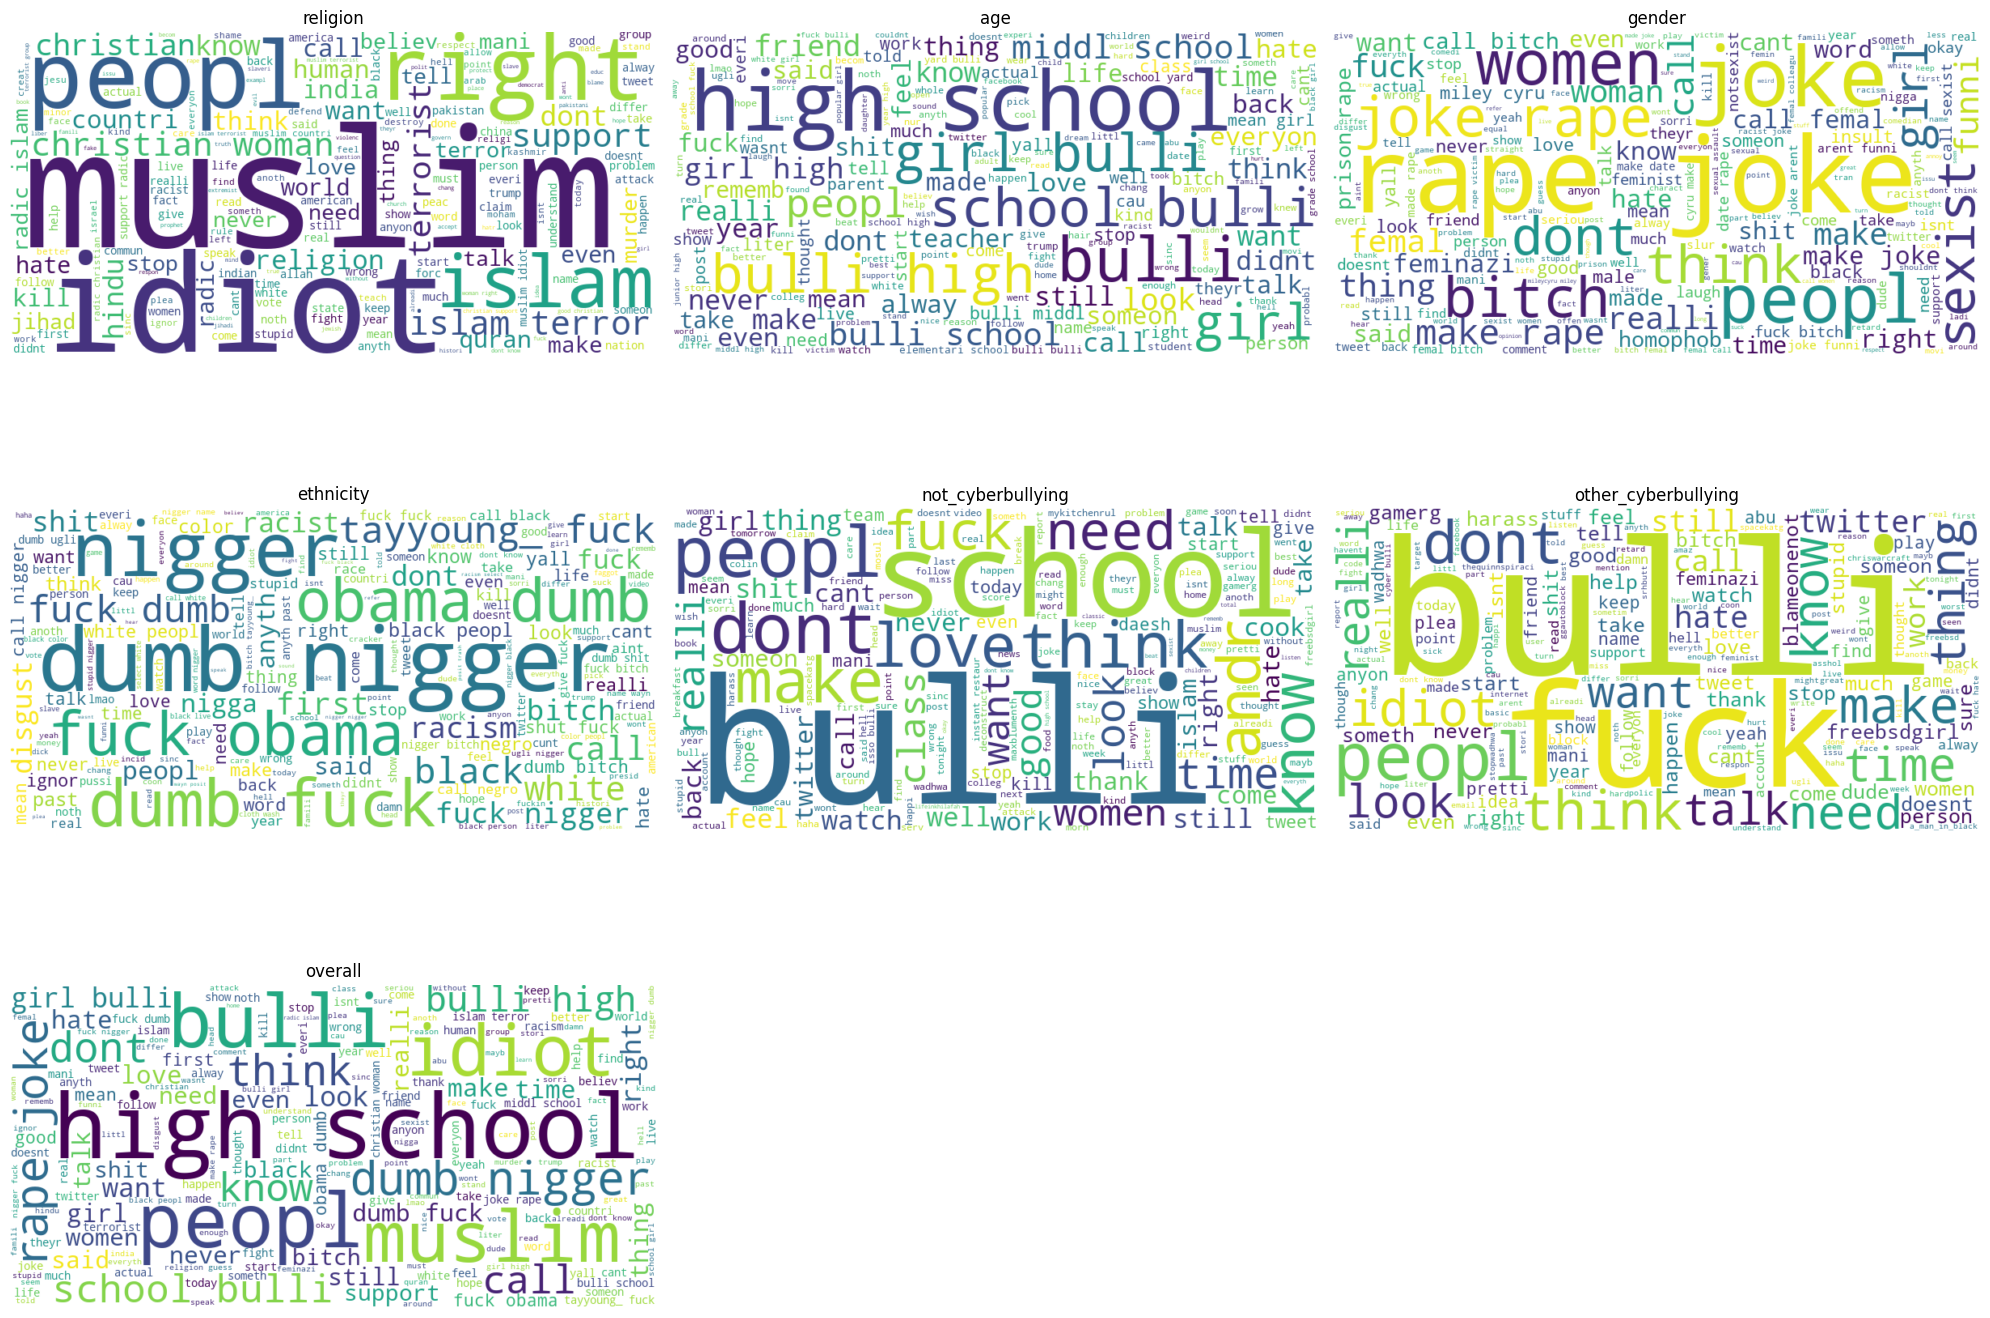

In [98]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def convert_to_string(x):
    if isinstance(x, list):
        return ' '.join(x)
    elif isinstance(x, str):
        return x
    else:
        return str(x)

data['tweet_text'] = data['tweet_text'].apply(convert_to_string)

classes = ['religion', 'age', 'gender', 'ethnicity', 'not_cyberbullying', 'other_cyberbullying', 'overall']

plt.figure(figsize=(20, 15))

for i, cls in enumerate(classes):
    plt.subplot(3, 3, i + 1)
    
    if cls == 'overall':
        text = ' '.join(data['tweet_text'])
    else:
        text = ' '.join(data[data['cyberbullying_type'] == cls]['tweet_text'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(cls)

plt.tight_layout()
plt.show()


In [100]:
data['tweet_text']
data.to_csv(r'D:\Train\Cyber_Bulling\cyberbullying_tweets1.csv', index=False)